# Libraries & Packages

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
# gervasio file_path
file_path = r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"

In [ ]:
# shruti


In [ ]:
# fin

In [21]:
file_name = r"\controleConsolide.csv"
csv_path = file_path + file_name
df_control_Consolide = pd.read_csv(csv_path)

In [7]:
file_name = r"\controleConsolideSunday.csv"
csv_path = file_path + file_name
df_control_Consolide_Sunday = pd.read_csv(csv_path)

In [13]:
file_name = r"\controlePreConsolide.csv"
csv_path = file_path + file_name
df_control_Pre_Consolide = pd.read_csv(csv_path)

In [15]:
file_name = r"\interventionConsolide.csv"
csv_path = file_path + file_name
df_intervention_Consolide = pd.read_csv(csv_path)

In [17]:
file_name = r"\interventionConsolideSunday.csv"
csv_path = file_path + file_name
df_intervention_Consolide_Sunday = pd.read_csv(csv_path)

In [84]:
file_name = r"\interventionPreConsolide.csv"
csv_path = file_path + file_name
df_intervention_Pre_Consolide = pd.read_csv(csv_path)

In [39]:
file_name = r"\socioEcodata.csv"
csv_path = file_path + file_name
df_socio = pd.read_csv(csv_path)

## Generic Data comments:
1. Socioeconomic info for 1138 ANON_IDs with a total of 18 columns
2. ControlConsolide has 11420 half-hour readings for 506 ANON_IDs
3. Socioeconomic has no repeated features nor ANON_IDs
4. In ControlConsolide, 487 / 506 ANON_IDs dhave socioeconomic features
5. The timeframe of ControlConsolide is 2024-04-01 to 2024-12-31


In [90]:

df_socio_col = df_socio.columns
print(df_socio_col)


Index(['HASH_KEY', 'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY',
       'CHILDREN_AT_HOME', 'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS',
       'OCCUPATION', 'EMPLOYMENT_STATUS', 'HIGHEST_QUALIFICATION',
       'HOME_OWNERSHIP', 'HOME_TYPE', 'HOME_VALUE', 'SOCIAL_GRADE',
       'TARIFF_GROUP', 'ESTIMATED_CONSUMPTION_ELEC_DAY',
       'ESTIMATED_CONSUMPTION_ELEC_NIGHT', 'ESTIMATED_CONSUMPTION_TOTAL'],
      dtype='object')


### Control 
Time frame: 2024-04-01 to 2024-12-31
Shape: (11420, 507)
Common ground: 487 / 506

### Control Sunday
Time frame: 2024-04-07 - 2024-12-31
Shape: (1872, 504)
Common ground: 487 / 503

## Pre Control
Time frame: 2023-02-02 - 2024-01-31
Shape: (17314, 321)
Common ground: 313 / 320

### Intervention
Time frame:  2024-04-01 - 2024-12-31
Shape: (11308, 667)
Common ground: 644 / 666

### Intervention Sunday
Time frame:  2024-04-07 - 2024-12-31
Shape: (1872, 664)
Common ground: 643 / 663

### Pre Intervention  
Time frame:   2023-02-02 - 2024-01-31
Shape: (17371, 388)
Common ground: 372 / 387



In [154]:
df_control_Consolide_Sunday = df_control_Pre_Consolide
print(df_control_Consolide_Sunday.shape)
cols_df_control_Consolide_Sunday = df_control_Consolide_Sunday.columns

print(df_control_Consolide_Sunday.head())
print(df_control_Consolide_Sunday.tail())
common_keys_df_control_Consolide_Sunday = df_socio['HASH_KEY'].isin(cols_df_control_Consolide_Sunday)
print(f"Number of matching entries: {common_keys_df_control_Consolide_Sunday.sum()}")

df_control_Consolide_Sunday = df_control_Consolide_Sunday.rename(columns={'Unnamed: 0': 'Time'})
df_control_Consolide_Sunday['Time'] = pd.to_datetime(df_control_Consolide_Sunday['Time'])

# Unpivot (melt) the dataset: Convert wide format to long format
df_control_Consolide_Sunday_long = df_control_Consolide_Sunday.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH')
df_control_Consolide_Sunday_long['Month'] = df_control_Consolide_Sunday_long['Time'].dt.month
df_control_Consolide_Sunday_long['DayOfWeek'] = df_control_Consolide_Sunday_long['Time'].dt.day_name()
df_control_Consolide_Sunday_long['HalfHour'] = df_control_Consolide_Sunday_long['Time'].dt.strftime('%H:%M')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count occurrences per (Month, DayOfWeek)
entries_count = df_control_Consolide_Sunday_long.groupby(['DayOfWeek', 'Month']).size().unstack()
entries_count = entries_count.reindex(day_order)
entries_count = entries_count.fillna(0).astype(int)



(17314, 321)
            Unnamed: 0  \
0  2023-02-02 00:00:00   
1  2023-02-02 00:30:00   
2  2023-02-02 01:00:00   
3  2023-02-02 01:30:00   
4  2023-02-02 02:00:00   

   4dd3317694364b953434dc42eff7f9950095c4ab537c3bdff2c3f5aa2e5fed9e  \
0                                              0.140                  
1                                              0.138                  
2                                              0.128                  
3                                              0.149                  
4                                              0.137                  

   1d8d1cc8eb7b30b825cf034be5b4ca0a2a2feb0982640775dc2695346f75504e  \
0                                              0.067                  
1                                              0.134                  
2                                              0.061                  
3                                              0.050                  
4                                              0

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='DayOfWeek'>

Text(0.5, 36.72222222222221, 'Month')

Text(120.72222222222221, 0.5, 'Day of the Week')

Text(0.5, 1.0, 'Number of Entries per Day of the Week and Month')

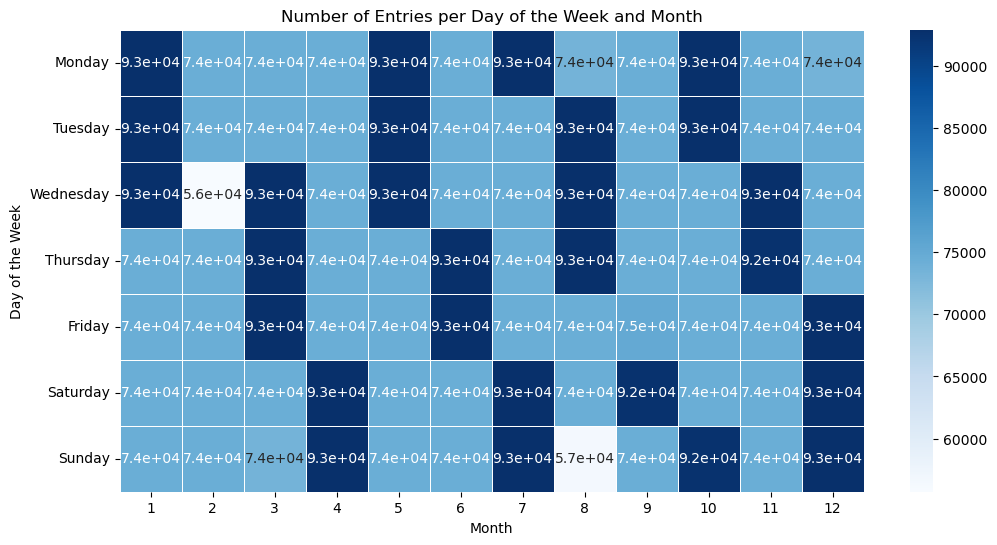

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(entries_count, annot=True, cmap="Blues", linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.title("Number of Entries per Day of the Week and Month")
plt.show()



In [56]:
df_socio.columns

Index(['HASH_KEY', 'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY',
       'CHILDREN_AT_HOME', 'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS',
       'OCCUPATION', 'EMPLOYMENT_STATUS', 'HIGHEST_QUALIFICATION',
       'HOME_OWNERSHIP', 'HOME_TYPE', 'HOME_VALUE', 'SOCIAL_GRADE',
       'TARIFF_GROUP', 'ESTIMATED_CONSUMPTION_ELEC_DAY',
       'ESTIMATED_CONSUMPTION_ELEC_NIGHT', 'ESTIMATED_CONSUMPTION_TOTAL'],
      dtype='object')

In [58]:
df_socio.head()

,HASH_KEY,AGE_GROUP,INCOME_CATEGORY,HOUSEHOLD_OCCUPANCY,CHILDREN_AT_HOME,HOUSEHOLD_SIZE,NUMBER_OF_BEDROOMS,OCCUPATION,EMPLOYMENT_STATUS,HIGHEST_QUALIFICATION,HOME_OWNERSHIP,HOME_TYPE,HOME_VALUE,SOCIAL_GRADE,TARIFF_GROUP,ESTIMATED_CONSUMPTION_ELEC_DAY,ESTIMATED_CONSUMPTION_ELEC_NIGHT,ESTIMATED_CONSUMPTION_TOTAL
0,8399087eaac9d88e3c6fce0c76484d18a40576c2fd46b7...,35-44,"50,000-74,999",Couple Household,0,2,3,Professional,Employed,University Degree or Higher,Owner Occupied,Semi-Detached House,250-500k,Social grade B,Deemed,2088,0,2088
1,b2d78d29b401e989873368a90f4079ba17bf5448db4c73...,65-74,"30,000-39,999",Couple Household,0,2,3,Retired,Not Employed,A Level Equivalent,Owner Occupied,Semi-Detached House,250-500k,Social grade C1,EDF Essentials,2422,0,2422
2,dc1ec3fca1531822856b50fabe334a17a6053dccb66498...,55-64,"0-9,999",Single Adult Household,0,1,1,Director/Managerial,Employed,University Degree or Higher,Owner Occupied,Flat or Maisonette,250-500k,Social grade C1,Safeguard Assist,1374,0,1374
3,cd68542ea1a700c995074c15c8f41973443359a9bbff2a...,75+,"20,000-29,999",Single Adult Household,0,1,1,Retired,Not Employed,University Degree or Higher,Owner Occupied,Flat or Maisonette,250-500k,Social grade C1,EDF Essentials,2619,0,2619
4,fef90b0143496f6e158ba9db416049340d590648659fc6...,55-64,"100,000+",Couple Household,0,2,4,Professional,Employed,University Degree or Higher,Owner Occupied,Detached House,250-500k,Social grade B,Standard,5504,0,5504


In [62]:
common_keys = df_socio['HASH_KEY'].isin(cols_control_consolide)
print(f"Number of matching entries: {common_keys.sum()}")

Number of matching entries: 487


In [64]:
# Count the number of duplicate HASH_KEY values
duplicate_counts = df_socio['HASH_KEY'].duplicated().sum()
print(f"Number of duplicate HASH_KEY entries: {duplicate_counts}")

Number of duplicate HASH_KEY entries: 0


In [70]:
# Get all column names from df_control_Consolide
cols_control_consolide = set(df_control_Consolide.columns)

# Check which columns are NOT in df_socio['HASH_KEY']
missing_cols = cols_control_consolide - set(df_socio['HASH_KEY'])

print("Columns in df_control_Consolide that are NOT in df_socio['HASH_KEY']:")
print(missing_cols)


Columns in df_control_Consolide that are NOT in df_socio['HASH_KEY']:
{'974b62dc16b47fde35954aa89d621c6b059df2f8ecb0ff463bd8421decfe2b4b', '31997152c8a481c326d6cb05abbd7690403eaf513945e1aba3279f31d344c956', '6dde0e5269f557dc5530f5107a9ad925b7fafc6a52d4f6fef834a0e23fd8b63c', 'f2848aa492c813342866756de0da956026d4331e105b16f881357cae62dae2c1', 'ab48a3a3cca4eedbb8d6317c4e02de2523ecaa866117a0672aa989fa830ba52a', 'e06665e30bb8bb901086cebe613ee5e64c2750c5b847281760cbf6754a75e66c', 'cef4e134e06416be90396291d8a37128906c0bf249ef71d696a4f0b22d3cffde', 'd4a27dd49c8bf8270dff2411f456287af4ad6d0fd86889506362b9fd13f86e87', '018e0c5cf686da1b7ac2d170d54aba9263fdc420b65ff5e71d4539e926385772', 'f4c3bcbc7dd37e40f8f6238c94fd99b4e488f7ec07f54dbd53849f23d0c34e1f', '1e1bfa63fff199a44b7b248c11265dd721b33f1d2edc7e9fae9f714bbba78564', 'Unnamed: 0', 'bbd37f115949e74f97d7fbb407e3ed505bc179507d744340dace2d71a5813950', '0a67e7537bf618ab4f6983665d02d2cba69773971926d22c411678814d730ff0', '585675d4b905182ed7cee11a72597a

# EDA

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average ELEC_KWH')

Text(0.5, 1.0, 'Average Electricity Consumption per Month')

([<matplotlib.axis.XTick at 0x187ad835760>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

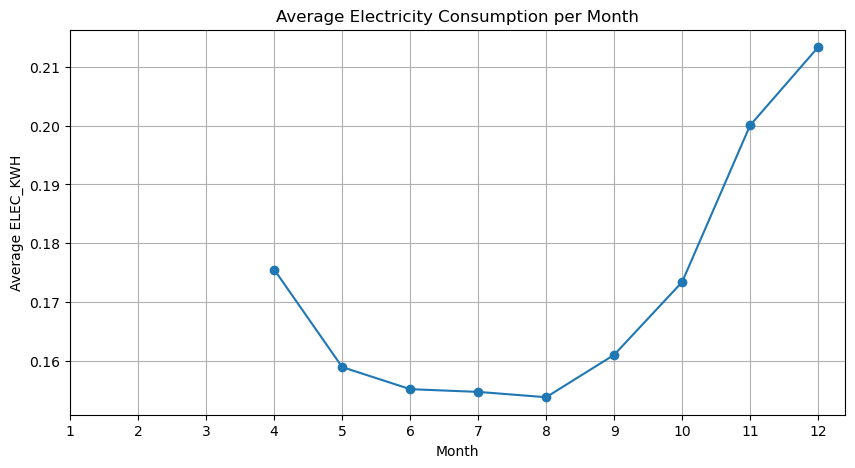

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='HalfHour', ylabel='ELEC_KWH'>

Text(0.5, 0, 'Half-Hour Time Slot')

Text(0, 0.5, 'Average Electricity Consumption (ELEC_KWH)')

Text(0.5, 1.0, 'Average Electricity Consumption per Half-Hour by Day of the Week')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00'),
  Text(1, 0, '00:30'),
  Text(2, 0, '01:00'),
  Text(3, 0, '01:30'),
  Text(4, 0, '02:00'),
  Text(5, 0, '02:30'),
  Text(6, 0, '03:00'),
  Text(7, 0, '03:30'),
  Text(8, 0, '04:00'),
  Text(9, 0, '04:30'),
  Text(10, 0, '05:00'),
  Text(11, 0, '05:30'),
  Text(12, 0, '06:00'),
  Text(13, 0, '06:30'),
  Text(14, 0, '07:00'),
  Text(15, 0, '07:30'),
  Text(16, 0, '08:00'),
  Text(17, 0, '08:30'),
  Text(18, 0, '09:00'),
  Text(19, 0, '09:30'),
  Text(20, 0, '10:00'),
  Text(21, 0, '10:30'),
  Text(22, 0, '11:00'),
  Text(23, 0, '11:30'),
  Text(24, 0, '12:00'),
  Text(25, 0, '12:30'),
  Text(26, 0, '13:00'),
  Text(27, 0, '13:30'),
  Text(28, 0, '14:00'),
  Text(29, 0, '14:30'),
  Text(30, 

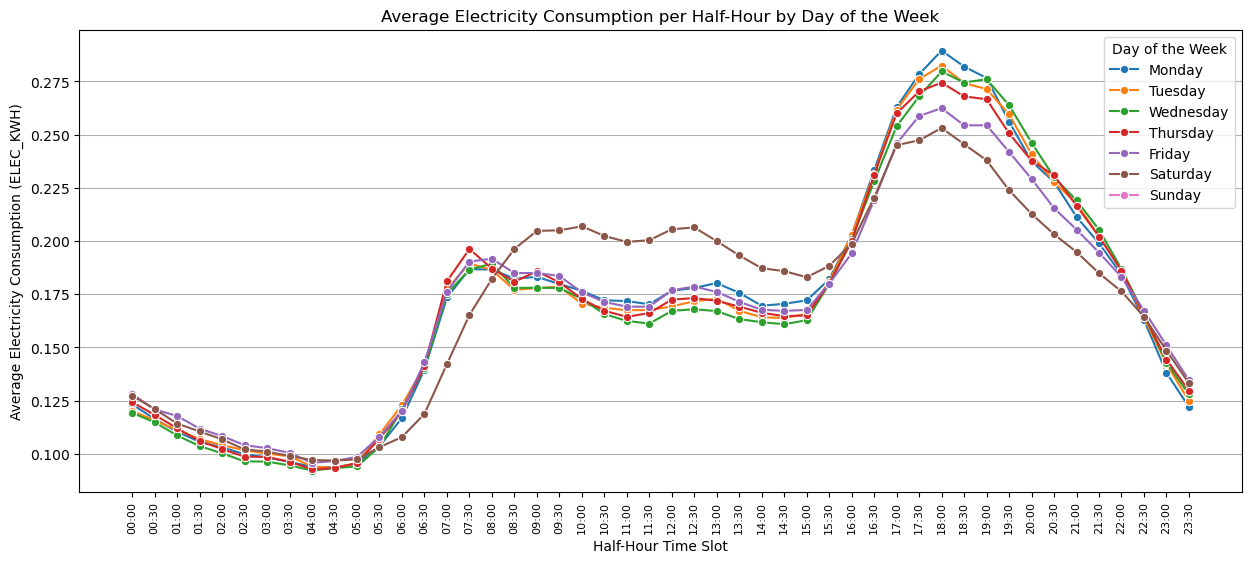

<Figure size 1500x600 with 0 Axes>

<Axes: title={'center': 'ELEC_KWH'}, xlabel='HalfHour'>

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(1, 0, '00:00'),
  Text(2, 0, '00:30'),
  Text(3, 0, '01:00'),
  Text(4, 0, '01:30'),
  Text(5, 0, '02:00'),
  Text(6, 0, '02:30'),
  Text(7, 0, '03:00'),
  Text(8, 0, '03:30'),
  Text(9, 0, '04:00'),
  Text(10, 0, '04:30'),
  Text(11, 0, '05:00'),
  Text(12, 0, '05:30'),
  Text(13, 0, '06:00'),
  Text(14, 0, '06:30'),
  Text(15, 0, '07:00'),
  Text(16, 0, '07:30'),
  Text(17, 0, '08:00'),
  Text(18, 0, '08:30'),
  Text(19, 0, '09:00'),
  Text(20, 0, '09:30'),
  Text(21, 0, '10:00'),
  Text(22, 0, '10:30'),
  Text(23, 0, '11:00'),
  Text(24, 0, '11:30'),
  Text(25, 0, '12:00'),
  Text(26, 0, '12:30'),
  Text(27, 0, '13:00'),
  Text(28, 0, '13:30'),
  Text(29, 0, '14:00'),
  Text(30, 0, '14:30'),
  Text(31, 0, '15:00'),
  Text(32, 0, '15:30'),
  Text(33, 0, '16:00'),

Text(0.5, 0, 'Half-Hour Time Slot')

Text(0, 0.5, 'ELEC_KWH')

Text(0.5, 1.0, 'Electricity Consumption Box Plot (Half-Hourly)')

Text(0.5, 0.98, '')

<Figure size 1500x600 with 0 Axes>

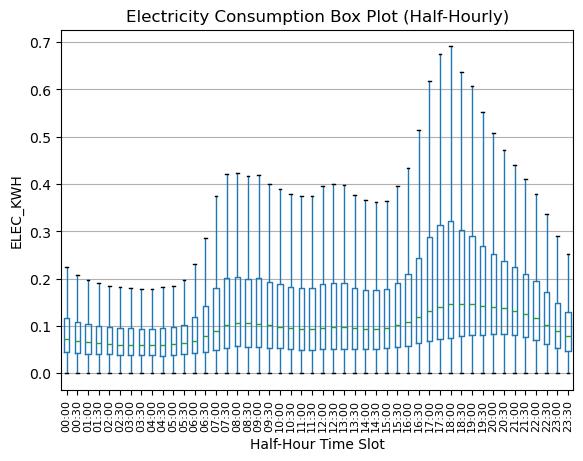

In [120]:
df_control_Consolide = df_control_Consolide.rename(columns={'Unnamed: 0': 'Time'})
df_control_Consolide['Time'] = pd.to_datetime(df_control_Consolide['Time'])

# Unpivot (melt) the dataset: Convert wide format to long format
df_control_Consolide_long = df_control_Consolide.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH')
df_control_Consolide_long['Month'] = df_control_Consolide_long['Time'].dt.month
df_control_Consolide_long['DayOfWeek'] = df_control_Consolide_long['Time'].dt.day_name()
df_control_Consolide_long['HalfHour'] = df_control_Consolide_long['Time'].dt.strftime('%H:%M')  # Captures half-hourly reading format


## 1. Plot: Average Consumption Across Months
monthly_avg = df_control_Consolide_long.groupby('Month')['ELEC_KWH'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average ELEC_KWH')
plt.title('Average Electricity Consumption per Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


# Compute the average ELEC_KWH for each HalfHour and DayOfWeek across all ANON_IDs
df_avg_halfhour = df_control_Consolide_long.groupby(['HalfHour', 'DayOfWeek'])['ELEC_KWH'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_avg_halfhour['DayOfWeek'] = pd.Categorical(df_avg_halfhour['DayOfWeek'], categories=day_order, ordered=True)

# Plot: Line chart for average electricity consumption per half-hour slot, with each line representing a day of the week
plt.figure(figsize=(15,6))
sns.lineplot(data=df_avg_halfhour, x="HalfHour", y="ELEC_KWH", hue="DayOfWeek", marker="o")
plt.xlabel("Half-Hour Time Slot")
plt.ylabel("Average Electricity Consumption (ELEC_KWH)")
plt.title("Average Electricity Consumption per Half-Hour by Day of the Week")
plt.xticks(rotation=90, fontsize=8)
plt.legend(title="Day of the Week", bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

## 3 Boxplot: Consumption Across Half-Hour Intervals Over the Year
plt.figure(figsize=(15,6))
df_control_Consolide_long.boxplot(column='ELEC_KWH', by='HalfHour', grid=False, showfliers=False)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Half-Hour Time Slot')
plt.ylabel('ELEC_KWH')
plt.title('Electricity Consumption Box Plot (Half-Hourly)')
plt.suptitle('')  # Remove default boxplot title
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='DayOfWeek'>

Text(0.5, 36.72222222222221, 'Month')

Text(120.72222222222221, 0.5, 'Day of the Week')

Text(0.5, 1.0, 'Number of Entries per Day of the Week and Month')

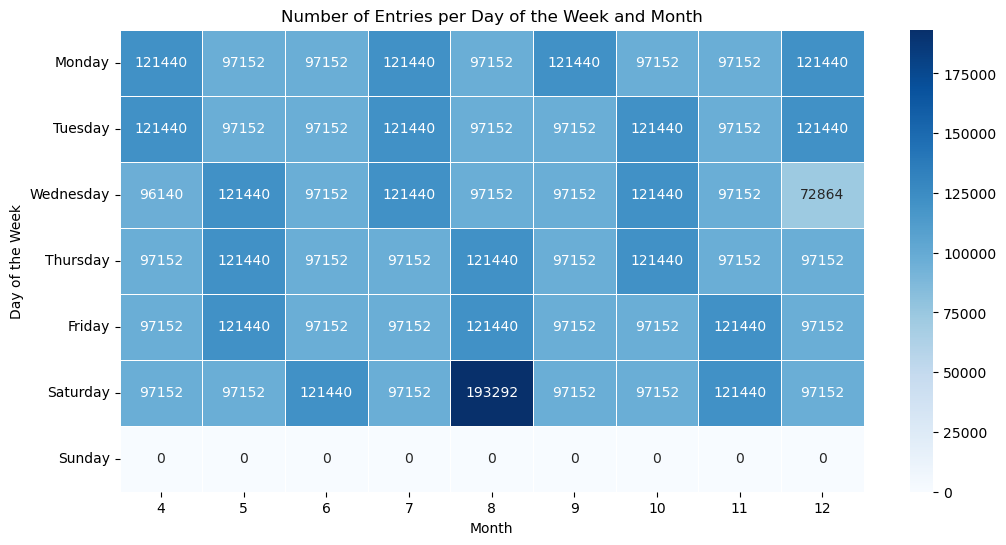

In [121]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count occurrences per (Month, DayOfWeek)
entries_count = df_control_Consolide_long.groupby(['DayOfWeek', 'Month']).size().unstack()
entries_count = entries_count.reindex(day_order)
entries_count = entries_count.fillna(0).astype(int)

plt.figure(figsize=(12,6))
sns.heatmap(entries_count, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.title("Number of Entries per Day of the Week and Month")
plt.show()



                    Time DayOfWeek  EntryCount  UniqueHouseholds
0    2024-08-01 00:00:00  Thursday         506               506
1    2024-08-01 00:30:00  Thursday         506               506
2    2024-08-01 01:00:00  Thursday         506               506
3    2024-08-01 01:30:00  Thursday         506               506
4    2024-08-01 02:00:00  Thursday         506               506
...                  ...       ...         ...               ...
1291 2024-08-31 21:30:00  Saturday         506               506
1292 2024-08-31 22:00:00  Saturday         506               506
1293 2024-08-31 22:30:00  Saturday         506               506
1294 2024-08-31 23:00:00  Saturday         506               506
1295 2024-08-31 23:30:00  Saturday         506               506

[1296 rows x 4 columns]


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='DayOfWeek', ylabel='EntryCount'>

Text(0.5, 1.0, 'Distribution of Entry Counts by Day in August')

Text(0, 0.5, 'Number of Entries')

Text(0.5, 0, 'Day of the Week')

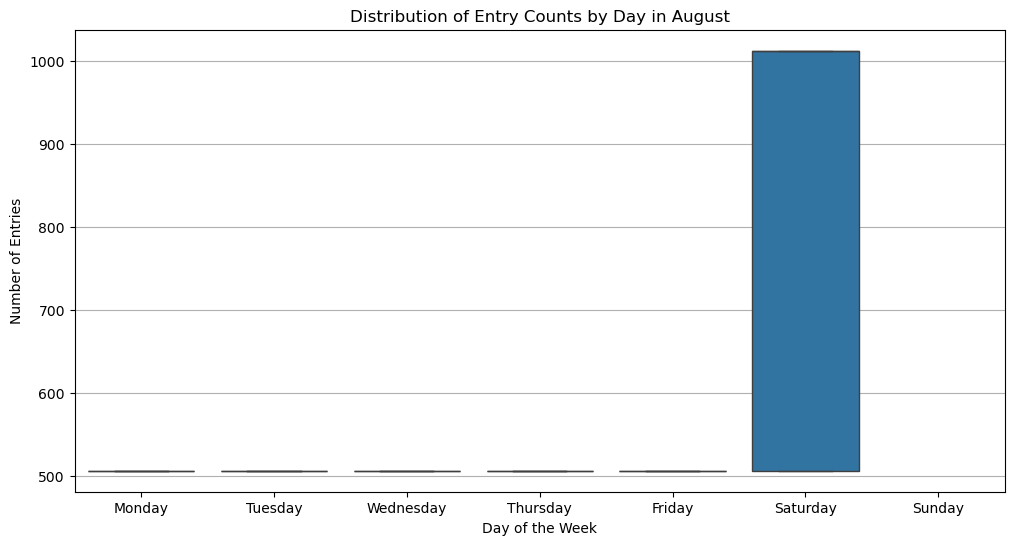

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='DayOfWeek', ylabel='UniqueHouseholds'>

Text(0.5, 1.0, 'Unique Households Reporting per Day in August')

Text(0, 0.5, 'Unique ANON_IDs')

Text(0.5, 0, 'Day of the Week')

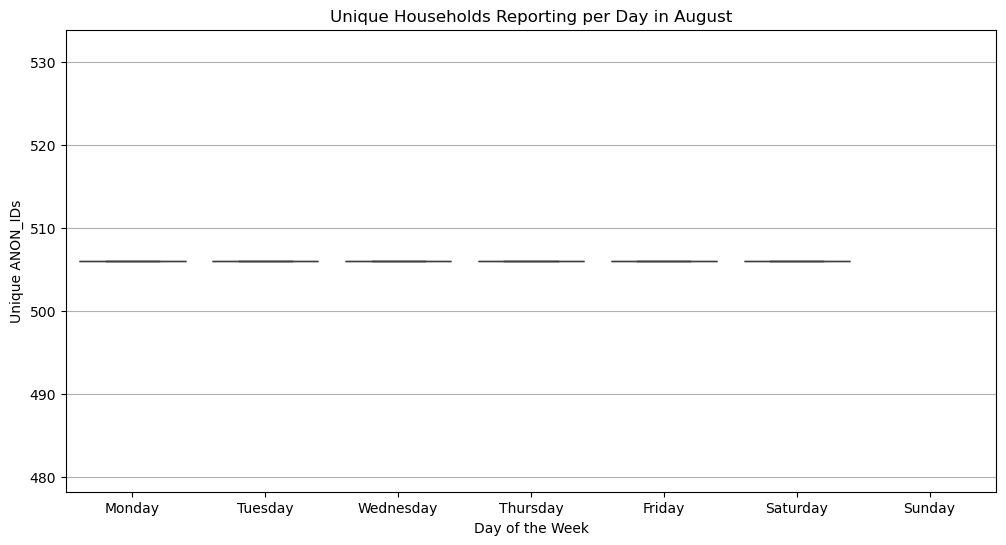

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Month 8
df_august = df_control_Consolide_long[df_control_Consolide_long['Month'] == 8]

# Count entries per day in Month 8
entries_per_day = df_august.groupby(['Time', 'DayOfWeek']).size().reset_index(name='EntryCount')

# Count unique ANON_IDs per day
unique_ids_per_day = df_august.groupby(['Time', 'DayOfWeek'])['ANON_ID'].nunique().reset_index(name='UniqueHouseholds')

# Merge both counts into one DataFrame
day_analysis = entries_per_day.merge(unique_ids_per_day, on=['Time', 'DayOfWeek'])

print(day_analysis)

# Plot total entries per day in August
plt.figure(figsize=(12,6))
sns.boxplot(x="DayOfWeek", y="EntryCount", data=entries_per_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribution of Entry Counts by Day in August")
plt.ylabel("Number of Entries")
plt.xlabel("Day of the Week")
plt.grid(axis="y")
plt.show()

# Plot unique households per day in August
plt.figure(figsize=(12,6))
sns.boxplot(x="DayOfWeek", y="UniqueHouseholds", data=unique_ids_per_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Unique Households Reporting per Day in August")
plt.ylabel("Unique ANON_IDs")
plt.xlabel("Day of the Week")
plt.grid(axis="y")
plt.show()


In [132]:
# Create a unique identifier combining 'Time' and 'ANON_ID'
df_control_Consolide_long['Time_ANON_ID'] = df_control_Consolide_long['Time'].astype(str) + "_" + df_control_Consolide_long['ANON_ID'].astype(str)

# Filter for Saturdays in August
df_august_saturdays = df_control_Consolide_long[(df_control_Consolide_long['Month'] == 8) & (df_control_Consolide_long['DayOfWeek'] == 'Saturday')]

# Check for duplicate entries based on 'Time_ANON_ID'
duplicate_entries = df_august_saturdays[df_august_saturdays.duplicated(subset=['Time_ANON_ID'], keep=False)]

duplicate_entries


,Time,ANON_ID,ELEC_KWH,Month,DayOfWeek,HalfHour,Time_ANON_ID
5134,2024-08-03 00:00:00,8d606eeffaed80dba63c8b58b3c8c5268854bb561079c9...,0.014,8,Saturday,00:00,2024-08-03 00:00:00_8d606eeffaed80dba63c8b58b3...
5135,2024-08-03 00:00:00,8d606eeffaed80dba63c8b58b3c8c5268854bb561079c9...,0.014,8,Saturday,00:00,2024-08-03 00:00:00_8d606eeffaed80dba63c8b58b3...
5136,2024-08-03 00:30:00,8d606eeffaed80dba63c8b58b3c8c5268854bb561079c9...,0.040,8,Saturday,00:30,2024-08-03 00:30:00_8d606eeffaed80dba63c8b58b3...
5137,2024-08-03 00:30:00,8d606eeffaed80dba63c8b58b3c8c5268854bb561079c9...,0.040,8,Saturday,00:30,2024-08-03 00:30:00_8d606eeffaed80dba63c8b58b3...
5138,2024-08-03 01:00:00,8d606eeffaed80dba63c8b58b3c8c5268854bb561079c9...,0.033,8,Saturday,01:00,2024-08-03 01:00:00_8d606eeffaed80dba63c8b58b3...
...,...,...,...,...,...,...,...
5772995,2024-08-17 22:30:00,ccda3cf02d63eb6357954d94acc8aae83535124d286085...,NaN,8,Saturday,22:30,2024-08-17 22:30:00_ccda3cf02d63eb6357954d94ac...
5772996,2024-08-17 23:00:00,ccda3cf02d63eb6357954d94acc8aae83535124d286085...,NaN,8,Saturday,23:00,2024-08-17 23:00:00_ccda3cf02d63eb6357954d94ac...
5772997,2024-08-17 23:00:00,ccda3cf02d63eb6357954d94acc8aae83535124d286085...,NaN,8,Saturday,23:00,2024-08-17 23:00:00_ccda3cf02d63eb6357954d94ac...
5772998,2024-08-17 23:30:00,ccda3cf02d63eb6357954d94acc8aae83535124d286085...,NaN,8,Saturday,23:30,2024-08-17 23:30:00_ccda3cf02d63eb6357954d94ac...


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='DayOfWeek'>

Text(0.5, 1.0, 'NaN Count in ELEC_KWH by Day of Week and Month')

Text(0.5, 36.72222222222221, 'Month')

Text(120.72222222222221, 0.5, 'Day of Week')

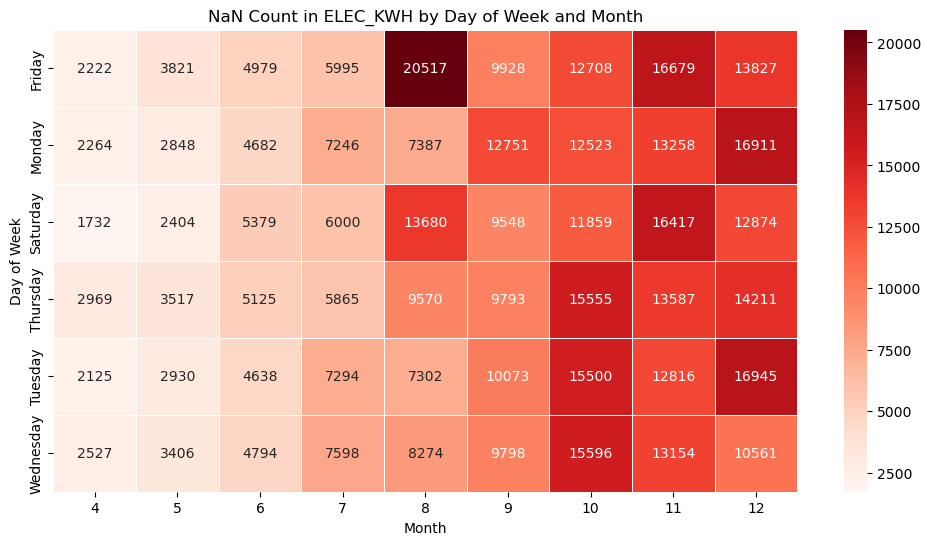

In [138]:
# Count NaN values per DayOfWeek and Month
nan_counts = df_control_Consolide_long.groupby(['Month', 'DayOfWeek'])['ELEC_KWH'].apply(lambda x: x.isna().sum()).reset_index()

# Rename columns for clarity
nan_counts.columns = ['Month', 'DayOfWeek', 'NaN_Count']

# Define the order of days for proper visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nan_counts['DayOfWeek'] = pd.Categorical(nan_counts['DayOfWeek'], categories=day_order, ordered=True)

# Plot heatmap to visualize missing values per day and month
plt.figure(figsize=(12, 6))
pivot_nan = nan_counts.pivot(index='DayOfWeek', columns='Month', values='NaN_Count')
sns.heatmap(pivot_nan, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)

plt.title("NaN Count in ELEC_KWH by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()



<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='DayOfWeek'>

Text(0.5, 1.0, 'Percentage of ANON_IDs with at least 192 NaNs in ELEC_KWH by Day and Month')

Text(0.5, 36.72222222222221, 'Month')

Text(120.72222222222221, 0.5, 'Day of Week')

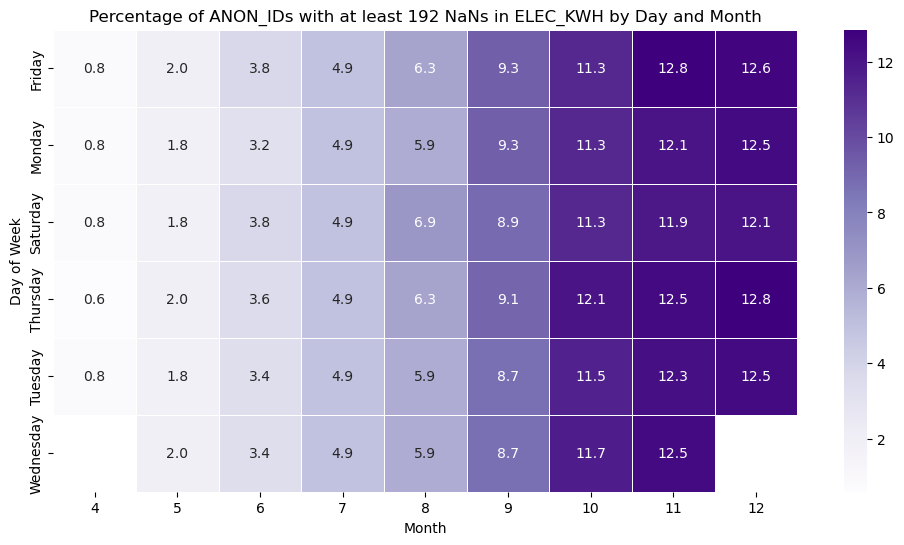

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count total ANON_IDs per DayOfWeek and Month
total_anon_counts = df_control_Consolide_long.groupby(['Month', 'DayOfWeek'])['ANON_ID'].nunique().reset_index()
total_anon_counts.columns = ['Month', 'DayOfWeek', 'Total_ANON_IDs']

# Count NaN values per ANON_ID, DayOfWeek, and Month
nan_counts_per_id = df_control_Consolide_long.groupby(['Month', 'DayOfWeek', 'ANON_ID'])['ELEC_KWH'].apply(lambda x: x.isna().sum()).reset_index()

# Rename columns for clarity
nan_counts_per_id.columns = ['Month', 'DayOfWeek', 'ANON_ID', 'NaN_Count']

# Filter to include only ANON_IDs with at least 10 NaNs
filtered_nan_counts = nan_counts_per_id[nan_counts_per_id['NaN_Count'] >= 192]

# Count how many unique ANON_IDs meet this condition per DayOfWeek and Month
anon_id_nan_summary = filtered_nan_counts.groupby(['Month', 'DayOfWeek'])['ANON_ID'].nunique().reset_index()
anon_id_nan_summary.columns = ['Month', 'DayOfWeek', 'Count_ANON_IDs']

# Merge with total ANON_IDs count to calculate the percentage
percentage_nan_summary = anon_id_nan_summary.merge(total_anon_counts, on=['Month', 'DayOfWeek'])
percentage_nan_summary['Percentage_ANON_IDs'] = (percentage_nan_summary['Count_ANON_IDs'] / percentage_nan_summary['Total_ANON_IDs']) * 100

# Define the order of days for proper visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
percentage_nan_summary['DayOfWeek'] = pd.Categorical(percentage_nan_summary['DayOfWeek'], categories=day_order, ordered=True)

# Plot heatmap to visualize the percentage of affected ANON_IDs
plt.figure(figsize=(12, 6))
pivot_anon_nan = percentage_nan_summary.pivot(index='DayOfWeek', columns='Month', values='Percentage_ANON_IDs')
sns.heatmap(pivot_anon_nan, annot=True, fmt=".1f", cmap="Purples", linewidths=0.5)

plt.title("Percentage of ANON_IDs with at least 192 NaNs in ELEC_KWH by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


,Time,ANON_ID,ELEC_KWH,Month,DayOfWeek,HalfHour
0,2023-02-02 00:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.140,2,Thursday,00:00
1,2023-02-02 00:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.138,2,Thursday,00:30
2,2023-02-02 01:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.128,2,Thursday,01:00
3,2023-02-02 01:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.149,2,Thursday,01:30
4,2023-02-02 02:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.137,2,Thursday,02:00
...,...,...,...,...,...,...
5540475,2024-01-31 21:30:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.155,1,Wednesday,21:30
5540476,2024-01-31 22:00:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.116,1,Wednesday,22:00
5540477,2024-01-31 22:30:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.088,1,Wednesday,22:30
5540478,2024-01-31 23:00:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.086,1,Wednesday,23:00


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='DayOfWeek'>

Text(0.5, 1.0, 'Percentage of ANON_IDs with at least 48 NaNs in ELEC_KWH by Day and Month')

Text(0.5, 36.72222222222221, 'Month')

Text(120.72222222222221, 0.5, 'Day of Week')

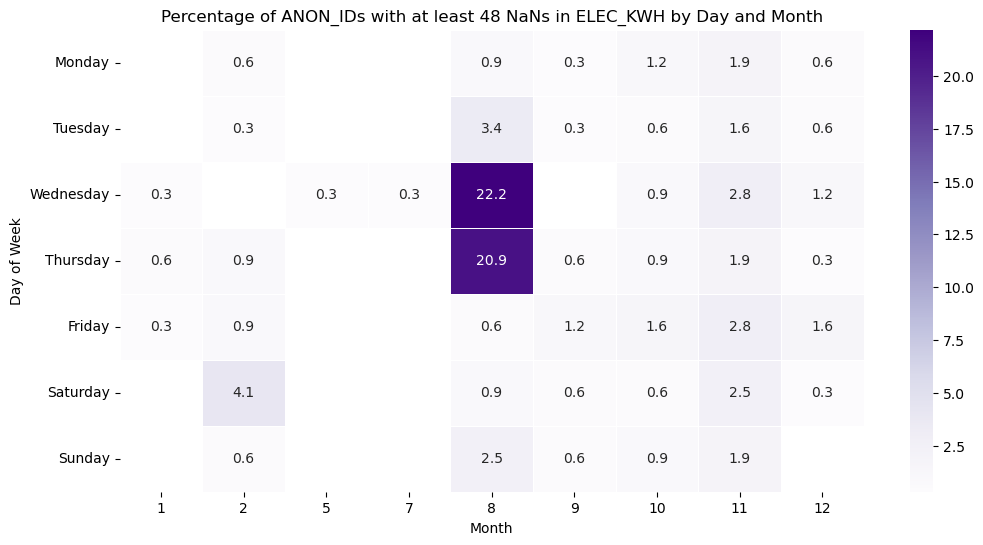

In [161]:
df_control_Consolide_Sunday_long
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count total ANON_IDs per DayOfWeek and Month
total_anon_counts = df_control_Consolide_Sunday_long.groupby(['Month', 'DayOfWeek'])['ANON_ID'].nunique().reset_index()
total_anon_counts.columns = ['Month', 'DayOfWeek', 'Total_ANON_IDs']

# Count NaN values per ANON_ID, DayOfWeek, and Month
nan_counts_per_id = df_control_Consolide_Sunday_long.groupby(['Month', 'DayOfWeek', 'ANON_ID'])['ELEC_KWH'].apply(lambda x: x.isna().sum()).reset_index()

# Rename columns for clarity
nan_counts_per_id.columns = ['Month', 'DayOfWeek', 'ANON_ID', 'NaN_Count']

# Filter to include only ANON_IDs with at least 10 NaNs
filtered_nan_counts = nan_counts_per_id[nan_counts_per_id['NaN_Count'] >= 48]

# Count how many unique ANON_IDs meet this condition per DayOfWeek and Month
anon_id_nan_summary = filtered_nan_counts.groupby(['Month', 'DayOfWeek'])['ANON_ID'].nunique().reset_index()
anon_id_nan_summary.columns = ['Month', 'DayOfWeek', 'Count_ANON_IDs']

# Merge with total ANON_IDs count to calculate the percentage
percentage_nan_summary = anon_id_nan_summary.merge(total_anon_counts, on=['Month', 'DayOfWeek'])
percentage_nan_summary['Percentage_ANON_IDs'] = (percentage_nan_summary['Count_ANON_IDs'] / percentage_nan_summary['Total_ANON_IDs']) * 100

# Define the order of days for proper visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
percentage_nan_summary['DayOfWeek'] = pd.Categorical(percentage_nan_summary['DayOfWeek'], categories=day_order, ordered=True)

# Plot heatmap to visualize the percentage of affected ANON_IDs
plt.figure(figsize=(12, 6))
pivot_anon_nan = percentage_nan_summary.pivot(index='DayOfWeek', columns='Month', values='Percentage_ANON_IDs')
sns.heatmap(pivot_anon_nan, annot=True, fmt=".1f", cmap="Purples", linewidths=0.5)

plt.title("Percentage of ANON_IDs with at least 48 NaNs in ELEC_KWH by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


## SOCIO ECONOMIC


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='AGE_GROUP'>

Text(0.5, 1.0, 'Distribution of AGE_GROUP (Ordered)')

Text(0.5, 0, 'AGE_GROUP')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-34'),
  Text(2, 0, '35-44'),
  Text(3, 0, '45-54'),
  Text(4, 0, '55-64'),
  Text(5, 0, '65-74'),
  Text(6, 0, '75+'),
  Text(7, 0, 'Unknown')])

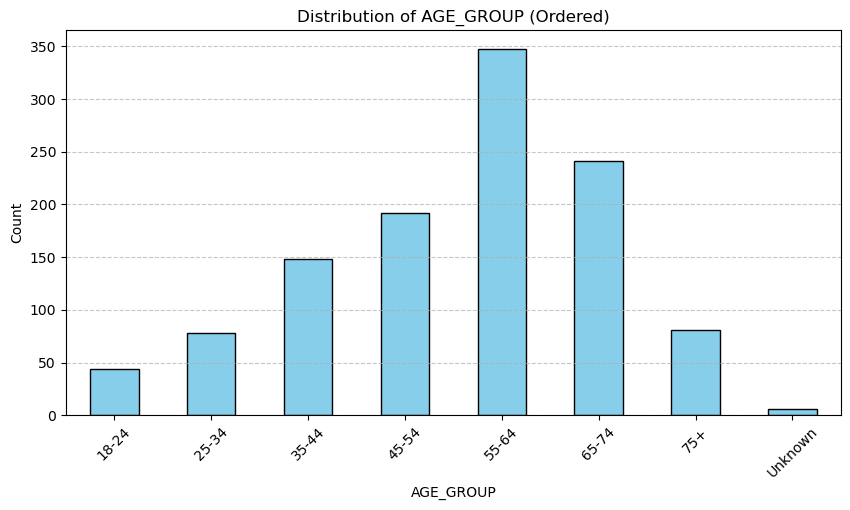

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='INCOME_CATEGORY'>

Text(0.5, 1.0, 'Distribution of INCOME_CATEGORY (Ordered)')

Text(0.5, 0, 'INCOME_CATEGORY')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0-9,999'),
  Text(1, 0, '10,000-19,999'),
  Text(2, 0, '20,000-29,999'),
  Text(3, 0, '30,000-39,999'),
  Text(4, 0, '40,000-49,999'),
  Text(5, 0, '50,000-74,999'),
  Text(6, 0, '75,000-99,999'),
  Text(7, 0, '100,000+'),
  Text(8, 0, 'Unknown')])

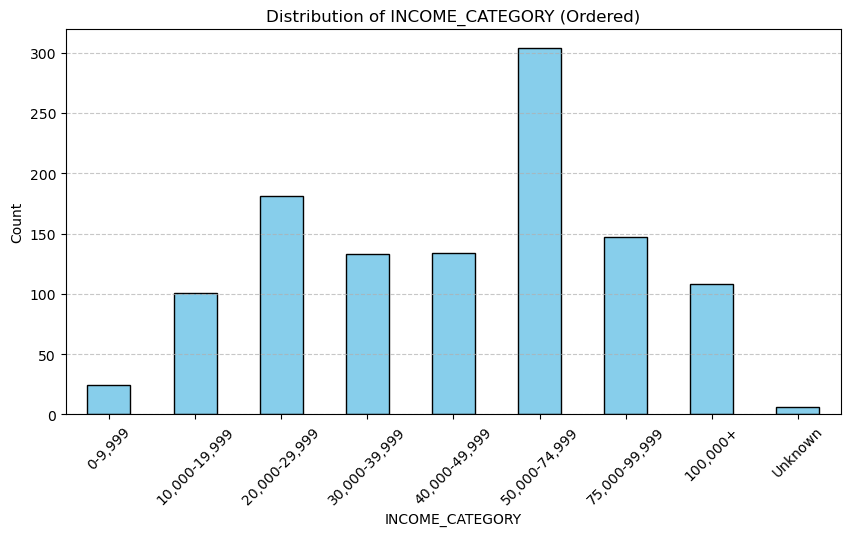

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='HOUSEHOLD_OCCUPANCY'>

Text(0.5, 1.0, 'Distribution of HOUSEHOLD_OCCUPANCY (Ordered)')

Text(0.5, 0, 'HOUSEHOLD_OCCUPANCY')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Adult Household'),
  Text(1, 0, 'Couple Household'),
  Text(2, 0, 'Multi-Occupancy Household'),
  Text(3, 0, 'Unknown')])

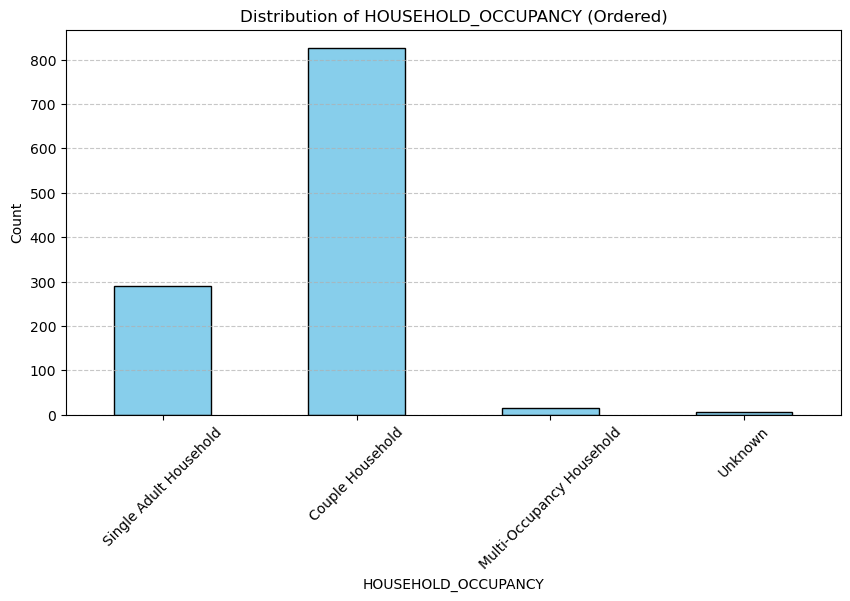

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='CHILDREN_AT_HOME'>

Text(0.5, 1.0, 'Distribution of CHILDREN_AT_HOME (Ordered)')

Text(0.5, 0, 'CHILDREN_AT_HOME')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2+'), Text(3, 0, 'Unknown')])

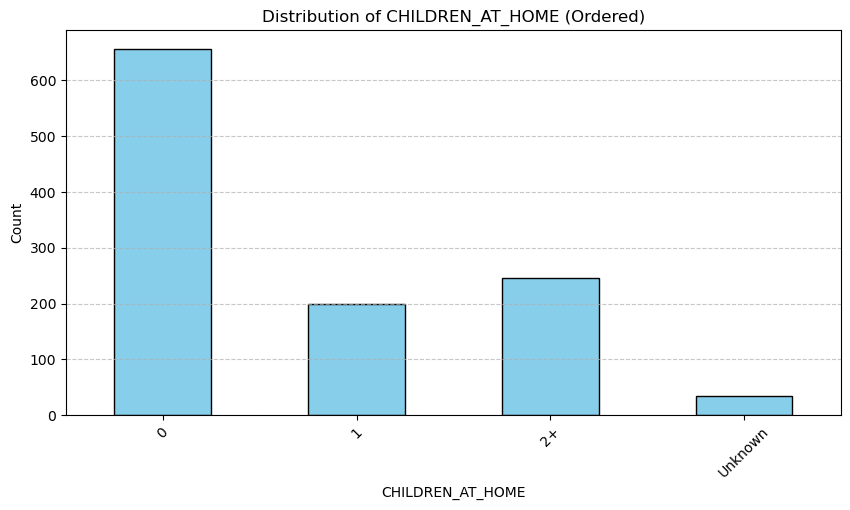

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Define categorical and numerical features
categorical_features = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY', 'CHILDREN_AT_HOME',
    'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS', 'OCCUPATION', 'EMPLOYMENT_STATUS',
    'HIGHEST_QUALIFICATION', 'HOME_OWNERSHIP', 'HOME_TYPE', 'SOCIAL_GRADE',
    'TARIFF_GROUP','HOME_VALUE'
]

numerical_features = [
    'ESTIMATED_CONSUMPTION_ELEC_DAY', 
    'ESTIMATED_CONSUMPTION_ELEC_NIGHT', 'ESTIMATED_CONSUMPTION_TOTAL'
]


# Define the correct order for each categorical feature
age_group_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+', 'Unknown']
income_category_order = ['0-9,999', '10,000-19,999', '20,000-29,999', '30,000-39,999', 
                         '40,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+', 'Unknown']
household_occupancy_order = ['Single Adult Household', 'Couple Household', 
                             'Multi-Occupancy Household', 'Unknown']
children_at_home_order = ['0', '1', '2+', 'Unknown']

# Convert columns to categorical with defined order
df_socio['AGE_GROUP'] = pd.Categorical(df_socio['AGE_GROUP'], categories=age_group_order, ordered=True)
df_socio['INCOME_CATEGORY'] = pd.Categorical(df_socio['INCOME_CATEGORY'], categories=income_category_order, ordered=True)
df_socio['HOUSEHOLD_OCCUPANCY'] = pd.Categorical(df_socio['HOUSEHOLD_OCCUPANCY'], categories=household_occupancy_order, ordered=True)
df_socio['CHILDREN_AT_HOME'] = pd.Categorical(df_socio['CHILDREN_AT_HOME'], categories=children_at_home_order, ordered=True)

# List of features to plot
categorical_features = ['AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY', 'CHILDREN_AT_HOME']

# Plot sorted categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df_socio[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature} (Ordered)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Distribution of ESTIMATED_CONSUMPTION_ELEC_DAY')

Text(0.5, 0, 'ESTIMATED_CONSUMPTION_ELEC_DAY')

Text(0, 0.5, 'Frequency')

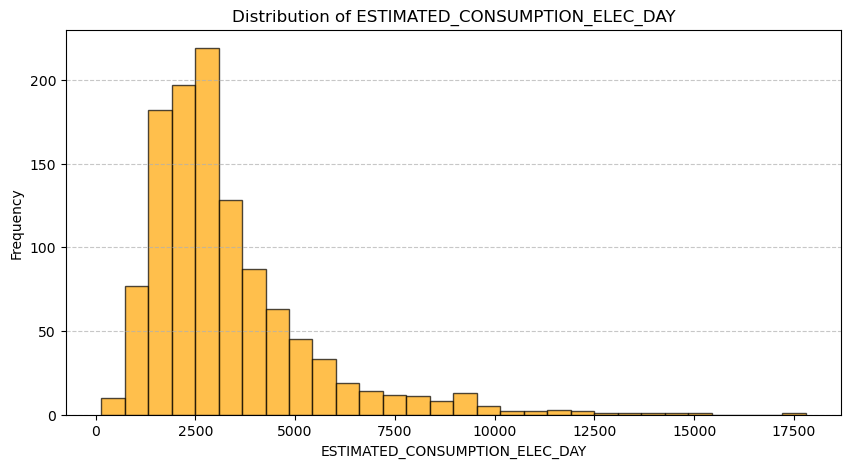

<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Distribution of ESTIMATED_CONSUMPTION_ELEC_NIGHT')

Text(0.5, 0, 'ESTIMATED_CONSUMPTION_ELEC_NIGHT')

Text(0, 0.5, 'Frequency')

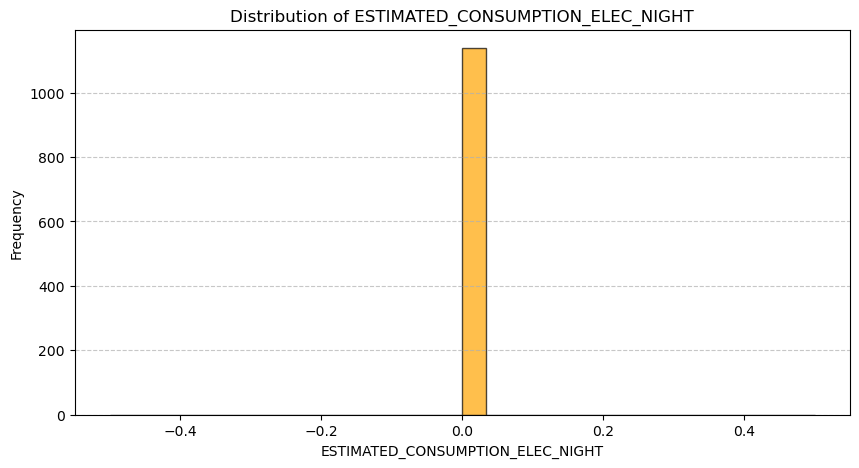

<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Distribution of ESTIMATED_CONSUMPTION_TOTAL')

Text(0.5, 0, 'ESTIMATED_CONSUMPTION_TOTAL')

Text(0, 0.5, 'Frequency')

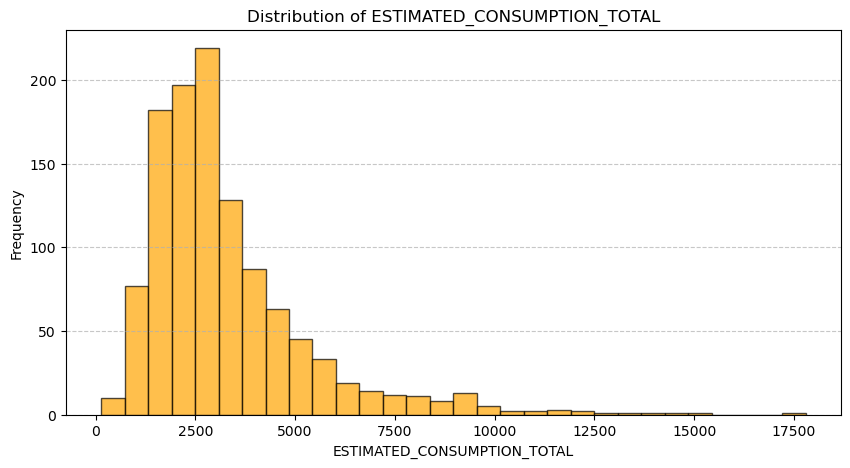

In [104]:


numerical_features = [
    'ESTIMATED_CONSUMPTION_ELEC_DAY', 
    'ESTIMATED_CONSUMPTION_ELEC_NIGHT', 'ESTIMATED_CONSUMPTION_TOTAL'
]
# Plot numerical features as histograms
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    df_socio[feature].plot(kind='hist', bins=30, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Categorical Features (Encoded)')

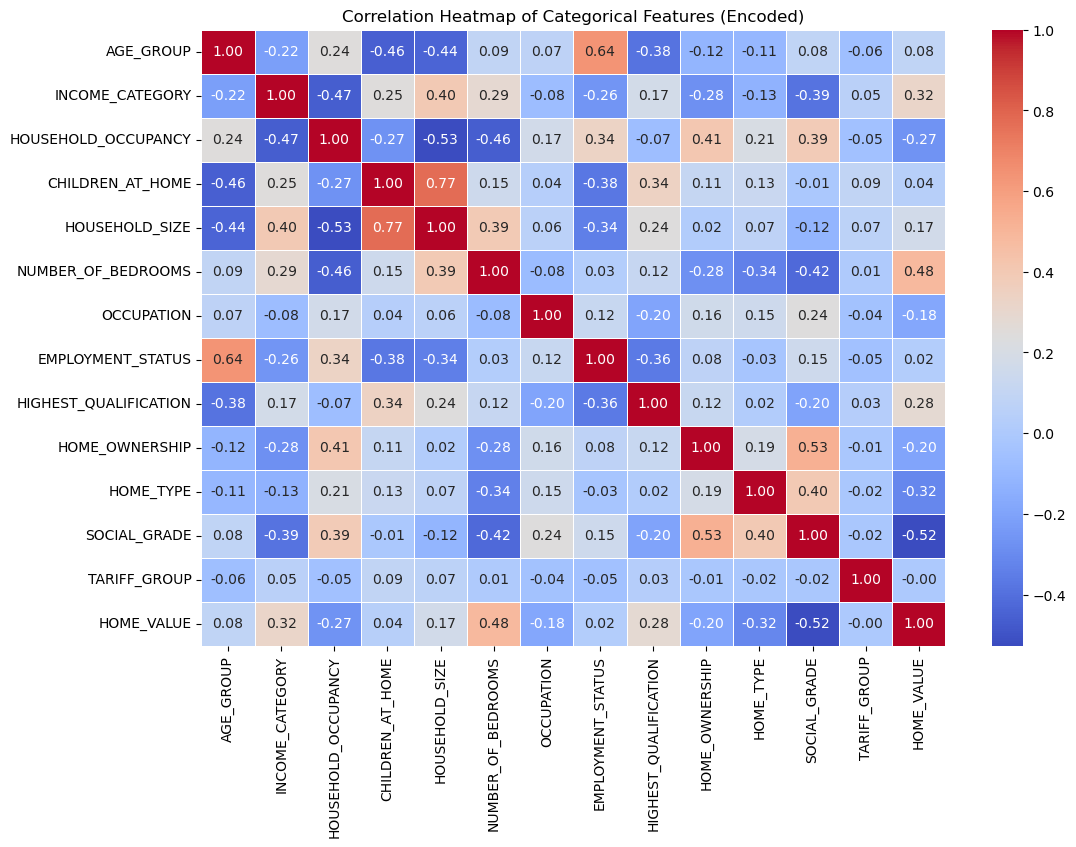

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY', 'CHILDREN_AT_HOME',
    'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS', 'OCCUPATION', 'EMPLOYMENT_STATUS',
    'HIGHEST_QUALIFICATION', 'HOME_OWNERSHIP', 'HOME_TYPE', 'SOCIAL_GRADE',
    'TARIFF_GROUP', 'HOME_VALUE'
]

# Create a copy of the dataframe to avoid modifying original data
df_encoded = df_socio[categorical_features].copy()

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to string to avoid issues with NaN
    label_encoders[col] = le

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Categorical Features (Encoded)")
plt.show()


In [110]:
import pandas as pd

# List of features to check
features = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY', 'CHILDREN_AT_HOME',
    'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS', 'OCCUPATION', 'EMPLOYMENT_STATUS',
    'HIGHEST_QUALIFICATION', 'HOME_OWNERSHIP', 'HOME_TYPE', 'SOCIAL_GRADE',
    'TARIFF_GROUP', 'HOME_VALUE'
]

# Count "Unknown" values per feature
unknown_counts = df_socio[features].apply(lambda x: (x == 'Unknown').sum())

# Calculate the percentage of "Unknown" values
unknown_percentage = (unknown_counts / len(df_socio)) * 100

# Create a summary DataFrame
unknown_summary = pd.DataFrame({
    'Feature': features,
    'Unknown_Count': unknown_counts.values,
    'Unknown_Percentage': unknown_percentage.values
})

unknown_summary


,Feature,Unknown_Count,Unknown_Percentage
0,AGE_GROUP,6,0.527241
1,INCOME_CATEGORY,6,0.527241
2,HOUSEHOLD_OCCUPANCY,6,0.527241
3,CHILDREN_AT_HOME,35,3.075571
4,HOUSEHOLD_SIZE,6,0.527241
5,NUMBER_OF_BEDROOMS,6,0.527241
6,OCCUPATION,6,0.527241
7,EMPLOYMENT_STATUS,6,0.527241
8,HIGHEST_QUALIFICATION,6,0.527241
9,HOME_OWNERSHIP,6,0.527241


In [114]:
unknown_age_hash_keys = df_socio.loc[df_socio['AGE_GROUP'] == 'Unknown', 'HASH_KEY']
unknown_age_hash_keys


107    da45e0a80966cd4b9f5ca6c0193a03398e28a307a4e833...
170    91f59759191ce53e5c8f8f8b7c4059f104cf411f703327...
388    315966d95c166a5ac4adb32f43c9efc7d83f6a329b1013...
431    bbb38d1299983f16aabe0478f0dce00ae21d3fe041ff3f...
615    f829e3ab557b14315c18052c22d9eb0239e0e6c3b6c4c8...
993    40f0ad90bfe9af640c81f9cb278c18c60df498f4f3eec2...
Name: HASH_KEY, dtype: object

In [116]:
unknown_age_hash_keys = df_socio.loc[df_socio['INCOME_CATEGORY'] == 'Unknown', 'HASH_KEY']
unknown_age_hash_keys

107    da45e0a80966cd4b9f5ca6c0193a03398e28a307a4e833...
170    91f59759191ce53e5c8f8f8b7c4059f104cf411f703327...
388    315966d95c166a5ac4adb32f43c9efc7d83f6a329b1013...
431    bbb38d1299983f16aabe0478f0dce00ae21d3fe041ff3f...
615    f829e3ab557b14315c18052c22d9eb0239e0e6c3b6c4c8...
993    40f0ad90bfe9af640c81f9cb278c18c60df498f4f3eec2...
Name: HASH_KEY, dtype: object

In [118]:
# Get all column names from df_control_Consolide
cols_control_consolide = set(df_control_Consolide.columns)

# Check which columns are NOT in df_socio['HASH_KEY']
missing_cols = cols_control_consolide - set(df_socio['HASH_KEY'])

print("Columns in df_control_Consolide that are NOT in df_socio['HASH_KEY']:")
print(missing_cols)


Columns in df_control_Consolide that are NOT in df_socio['HASH_KEY']:
{'cef4e134e06416be90396291d8a37128906c0bf249ef71d696a4f0b22d3cffde', 'f2abe7cbb5a60b61d874165fb6a1f0c7fcd4c33b8483759bc102ce4fbdf66365', '6dde0e5269f557dc5530f5107a9ad925b7fafc6a52d4f6fef834a0e23fd8b63c', '0a67e7537bf618ab4f6983665d02d2cba69773971926d22c411678814d730ff0', '31997152c8a481c326d6cb05abbd7690403eaf513945e1aba3279f31d344c956', 'a98f6c19e507bf7c07198b49919613e17465c9fffa59c6bc7ac0eeeb40ea217d', '5a1201e13a1fb54fdcd682525db62a20f48e9c30fa6377ecebd4773be01cab6e', 'ab48a3a3cca4eedbb8d6317c4e02de2523ecaa866117a0672aa989fa830ba52a', 'Time', 'e06665e30bb8bb901086cebe613ee5e64c2750c5b847281760cbf6754a75e66c', 'bbd37f115949e74f97d7fbb407e3ed505bc179507d744340dace2d71a5813950', '1e1bfa63fff199a44b7b248c11265dd721b33f1d2edc7e9fae9f714bbba78564', 'f2848aa492c813342866756de0da956026d4331e105b16f881357cae62dae2c1', '585675d4b905182ed7cee11a72597a682fbca36da153f6116fec806cf96ab0d5', '4ad2ed550310d9cf0c25d61b26241b9b93ac